In [67]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from preprocessing import myoseg_to_roi

Some code to check what the appropiate size is of Region-of-Interest crops around the heart.

This notebook might need some updates to function with changes in the rest of the code.

In [2]:
prediction_folder = Path(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\nnUnet_results\nnUNet\2d\Task500_MyocardSegmentation\predictions")
img_folder = Path(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\nnUnet_raw\nnUNet_raw_data\Task500_MyocardSegmentation\imagesTs")
original_img_folder = Path(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657")

In [17]:
def show_predictions(prediction_dir, img_dir, fixed_size=None):
    imgs = [f for f in img_dir.glob(f"*.nii.gz")]
    predictions = [f for f in prediction_dir.glob(f"*.nii.gz")]
    for pred_f in predictions:
        try:
            img_f = [f for f in imgs if pred_f.stem[:-8] == (f.stem)[:-13]]
            assert len(img_f) == 1
            img_f = img_f[0]
            # load prediction
            pred = sitk.ReadImage(str(pred_f))
            pred_arr = sitk.GetArrayFromImage(pred)
            # load image
            img = sitk.ReadImage(str(img_f))
            img_arr = sitk.GetArrayFromImage(img)
            # make roi
            #print("shapes:", img_arr.shape, pred_arr.shape)
            for i, (img_slice, pred_slice) in enumerate(zip(img_arr, pred_arr)):
                #print(img_slice.shape)
                roi = myoseg_to_roi(img_slice[None, ...], pred_arr, margin_frac=0.0, fixed_size=fixed_size)
                yield img_f, i, img_slice, pred_slice, roi
        except Exception as e:
            print('Something went wrong')
            print(pred_f)
            print(e)

    
    
def compare_dirs(nnunet_dir, og_dir):
    imgs1 = [f for f in nnunet_dir.glob(f"*.nii.gz")]
    imgs2 = [f for f in og_dir.glob(f"*PSIR*.mha")]
    for img1_f in imgs1:
        try:
            img2_f = [f for f in imgs2 if img1_f.stem[:-13] == f.stem]
            assert len(img2_f) == 1
            img2_f = img2_f[0]
            
            # load images
            img1 = sitk.ReadImage(str(img1_f))
            img1_arr = sitk.GetArrayFromImage(img1)
            img2 = sitk.ReadImage(str(img2_f))
            img2_arr = sitk.GetArrayFromImage(img2)
            
            if img2_arr.shape == img1_arr.shape:
                yield True
            else:
                yield False
        except Exception as e:
                print('Something went wrong')
                print(img1_f, img2_f)
                print(e)
            
    

In [39]:
generator = show_predictions(prediction_folder, img_folder, fixed_size=100)

DRAUMC0184_LGE_seq0_PSIR_singleshot_317_0000.nii, slice 7
roi.shape=(1, 100, 100)


[]

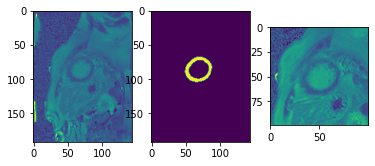

In [58]:
f, i, img, pred, roi = next(generator)
print(f"{f.stem}, slice {i}")
print(f'{roi.shape=}')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img)
ax2.imshow(pred)
ax3.imshow(roi[0])
plt.plot()

In [37]:
# find largest roi size
roi_max_size = 0
for f, i, img, pred, roi in show_predictions(prediction_folder, img_folder):
    #print(roi.shape)
    if roi.shape[-1] > roi_max_size:
        print(f'{roi_max_size} --> {roi.shape[-1]}')
        roi_max_size, f_max, i_max, img_max, pred_max, roi_max = roi.shape[-1], f, i, img, pred, roi
print(roi_max_size, f_max, i_max, img_max, pred_max, roi_max)

0 --> 29
29 --> 50
50 --> 54
54 --> 64
64 --> 68
68 --> 70
70 --> 78
78 --> 79
79 --> 82
Something went wrong
\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\nnUnet_results\nnUNet\2d\Task500_MyocardSegmentation\predictions\DRAUMC0606_LGE_seq0_PSIR_240.nii.gz
Found no myocard prediction in MRI
Something went wrong
\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\nnUnet_results\nnUNet\2d\Task500_MyocardSegmentation\predictions\DRAUMC0987_LGE_seq0_PSIR_487.nii.gz
Found no myocard prediction in MRI
Something went wrong
\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\nnUnet_results\nnUNet\2d\Task500_MyocardSegmentation\predictions\DRAUMC0743_LGE_seq0_PSIR_singleshot_267.nii.gz
Found no myocard prediction in MRI
82 --> 96
96 \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\nnUnet_raw\nnUNet_raw_data\Task500_MyocardSegmentation\imagesTs\DRAUMC0362_LGE_seq0_PSIR_singleshot_383_0000.nii.gz 0 [[2048 2048 2048 ... 2048 2048 2048]
 

DRAUMC0362_LGE_seq0_PSIR_singleshot_383_0000.nii, slice 0
roi_max.shape=(1, 96, 96)


[]

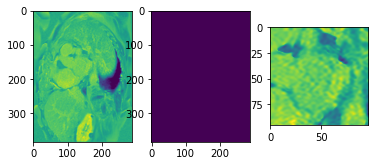

In [66]:
print(f"{f_max.stem}, slice {i_max}")
print(f'{roi_max.shape=}')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_max)
ax2.imshow(pred_max)
ax3.imshow(roi_max[0])
plt.plot()

In [8]:
gen2 = compare_dirs(img_folder, original_img_folder)

In [10]:
#for x in gen2:
#    if x == True:
#        print("unequal dims")

In [11]:
testarr = np.ones((3, 3))
testmask = np.array([[[0, 1, 1], [0, 1, 1], [0, 0, 0]]])
print(testarr, "\n", testmask)
print(testarr[0:-1, 0:-1])

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
 [[[0 1 1]
  [0 1 1]
  [0 0 0]]]
[[1. 1.]
 [1. 1.]]


In [12]:
testresult = myoseg_to_roi(testarr, testmask)

IndexError: tuple index out of range

In [ ]:
print(testresult)
print(testresult.shape)